In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data cleaning
df = pd.read_csv('./food_coded.csv', na_values="nan")

drop_cols = ['comfort_food', 'comfort_food_reasons',
'diet_current', 'eating_changes', 'father_profession',
'fav_cuisine', 'food_childhood','healthy_meal', 'ideal_diet',
'meals_dinner_friend','mother_profession','type_sports','weight']

df.drop(drop_cols, inplace=True, axis=1)
print(df.head())
print(df.get_dtype_counts())

print(df.isnull().sum().sum())

## fill na values
for column in df:
    median = df[column].median()
    df[column].fillna(median, inplace=True)
## end data cleaning
print(df.isnull().sum().sum())

     GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0  2.400       2          1               430           NaN           315.0   
1  3.654       1          1               610           3.0           420.0   
2  3.300       1          1               720           4.0           420.0   
3  3.200       1          1               430           3.0           420.0   
4  3.500       1          1               720           2.0           420.0   

   coffee  comfort_food_reasons_coded  cook  comfort_food_reasons_coded.1  \
0       1                         9.0   2.0                             9   
1       2                         1.0   3.0                             1   
2       2                         1.0   1.0                             1   
3       2                         2.0   2.0                             2   
4       2                         1.0   1.0                             1   

   ...  persian_food  self_perception_weight  soup  sports  th

In [3]:
to_drop2 =['Id','GPA','calories_chicken', 'calories_scone', 
           'comfort_food_reasons_coded.1','self_perception_weight', 
          'tortilla_calories','turkey_calories','waffle_calories',
          'ethnic_food', 'exercise', 'father_education',
          'eating_changes_coded', 'eating_changes_coded1','employment', 
          'nutritional_check', 'fav_cuisine_coded','life_rewarding','grade_level',
           'calories_day', 'pay_meal_out', 'tortilla_calories','turkey_calories',
          ]




df = pd.read_csv('./food_cleaned1.csv')
df.drop(to_drop2, inplace=True, axis=1)


In [4]:
print(df.head())

   Gender  breakfast  coffee  comfort_food_reasons_coded  cook  cuisine  \
0       2          1       1                           9     2        1   
1       1          1       2                           1     3        1   
2       1          1       2                           1     1        3   
3       1          1       2                           2     2        2   
4       1          1       2                           1     1        2   

   diet_current_coded  drink  eating_out  fav_food  ...  marital_status  \
0                   1      1           3         1  ...               1   
1                   2      2           2         1  ...               2   
2                   3      1           2         3  ...               2   
3                   2      2           2         1  ...               2   
4                   2      2           2         3  ...               1   

   mother_education  on_off_campus  parents_cook  persian_food  soup  sports  \
0                 

In [5]:

# df = StandardScaler().fit_transform(df)

# Run local implementation of kmeans
km = KMeans(n_clusters=3, max_iter=100)
km.fit(df)

labels =  km.labels_
print(len(labels))



9999


Text(0.5,1,'Visualization of clustered data')

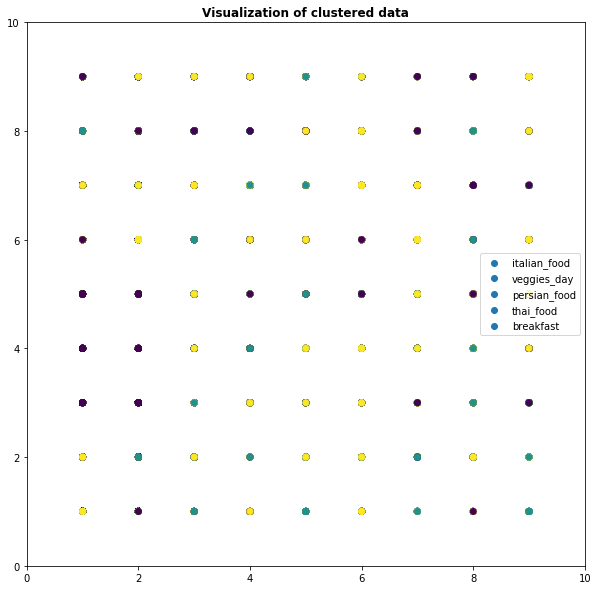

In [6]:

fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(df['persian_food'],df['italian_food'],
            c=km.labels_)
plt.scatter(df['Gender'],df['veggies_day'],
            c=km.labels_)
plt.scatter(df['Gender'],df['persian_food'],
            c=km.labels_ )
plt.scatter(df['Gender'],df['thai_food'],
            c=km.labels_ )
plt.scatter(df['coffee'],df['breakfast'],
            c=km.labels_ )



plt.legend()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Visualization of clustered data', fontweight='bold')



[2872, 3241, 3886]


<BarContainer object of 3 artists>

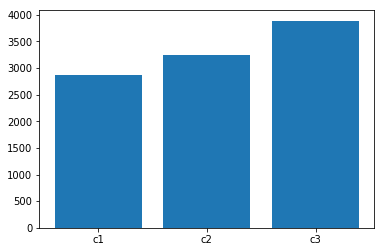

In [7]:
from collections import Counter
c=Counter(labels)
print(c.values())
plt.bar(['c1', 'c2','c3'],c.values())